# Problem 1 (Practice)

In the lectures, we learned about the forward-time centered-space (FTCS) method. Here we will actually implement this method to solve the heat diffusion equation, and compare the stationary solution to that obtained using the relaxation method.

The heat diffusion equation is
\begin{align*}
  \frac{\partial\phi(x,y,t)}{\partial t} = D \nabla^2\phi(x,y,t),
\end{align*}
where $\nabla^2 = \partial^2/\partial x^2 + \partial^2/\partial y^2$.

(a) Show, using the von Neumann stability analysis, that for two spatial dimensions, numerical stability requires
\begin{align*}
  \Delta t < \frac{\Delta r^2}{2D},
\end{align*}
where
\begin{align*}
  \frac{1}{\Delta r^2} = \frac{1}{\Delta x^2} + \frac{1}{\Delta y^2}.
\end{align*}
(15 pts)

(b) Solve the heat diffusion equation using the FTCS method for the domain $(L_x,L_y) = (1,1)$ and $D=0.2$. Choose the boundary conditions $\phi(x,L)=50$ and $\phi(x,0)=\phi(0,y)=\phi(L,y)=0$. Let $\phi=0$ at $t=0$ everywhere except $\phi(x,L)$. Choose an appropriate $\Delta t$ according the above stability condition. Instead of saving at each timestep which may require a large memory or storage space, save $\phi$ to memory every predetermined number of timesteps so that there are 200 temporal data points. Run for $T_{max}=1$. (40 pts)

In [8]:
#0.96으로 timestep두고 하면 그래프 잘나옴
import numpy as np

# --- Parameters ---
Lx, Ly = 1.0, 1.0  # Domain size
D = 0.2           # Diffusion constant
T_max = 1.0       # Total simulation time
Nx, Ny = 129, 129   # Number of grid points in x and y

# --- Discretization ---
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)
dr2_inv = 1/dx**2 + 1/dy**2
dr2 = 1 / dr2_inv

# --- Stability Condition and Time Step ---
dt_max = dr2 / (2 * D)
# Choose a dt that is stable, e.g., 95% of the maximum allowed value
dt = 0.95 * dt_max
n_steps = int(T_max / dt)

# We need 200 temporal data points
save_interval = max(1, n_steps // 200)
n_saves = n_steps // save_interval
print(f"Grid size: {Nx}x{Ny}")
print(f"dx = {dx:.4f}, dy = {dy:.4f}")
print(f"Max stable dt: {dt_max:.6f}")
print(f"Chosen dt: {dt:.6f}")
print(f"Total time steps: {n_steps}")
print(f"Saving data every {save_interval} steps, for a total of {n_saves} frames.")

# --- Initialization ---
# Initialize phi grid to 0
phi = np.zeros((Nx, Ny))
# Set boundary conditions
phi[:, Ny-1] = 50.0  # phi(x, L) = 50
# Other boundaries are already 0: phi(x,0)=0, phi(0,y)=0, phi(L,y)=0

# --- Data Storage ---
# Store the history of phi for animation
phi_history = np.zeros((n_saves + 1, Nx, Ny))
phi_history[0] = phi.copy()

# --- FTCS Solver ---
for n in range(n_steps):
    # Create a copy to store the updated values
    phi_new = phi.copy()
    
    # Update interior points
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            laplacian = (phi[i+1, j] - 2*phi[i, j] + phi[i-1, j]) / dx**2 + \
                        (phi[i, j+1] - 2*phi[i, j] + phi[i, j-1]) / dy**2
            phi_new[i, j] = phi[i, j] + D * dt * laplacian
    
    # Update phi for the next iteration
    phi = phi_new
    
    # Save data at specified intervals
    if (n + 1) % save_interval == 0:
        save_idx = (n + 1) // save_interval
        if save_idx < len(phi_history):
            phi_history[save_idx] = phi.copy()

print("Stable FTCS simulation complete.")

Grid size: 129x129
dx = 0.0078, dy = 0.0078
Max stable dt: 0.000076
Chosen dt: 0.000072
Total time steps: 13797
Saving data every 68 steps, for a total of 202 frames.


KeyboardInterrupt: 

(c) Using the plt.imshow function, animate the result and save to a mp4 file named 'Heat_equation.mp4'. (10 pts)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter

# --- Animation Setup ---
fig, ax = plt.subplots(figsize=(8, 6))

cax = ax.imshow(phi_history[0].T, cmap='hot', origin='lower', 
                extent=[0, Lx, 0, Ly], vmin=0, vmax=50)
fig.colorbar(cax, label='$\phi(x,y,t)$')

ax.set_title("Heat Diffusion (Stable), t = 0.00 s")
ax.set_xlabel("x")
ax.set_ylabel("y")

# --- Animation Update Function ---
def animate(i):
    # The data index corresponds to the frame number i
    data_idx = i
    current_time = data_idx * save_interval * dt
    
    # Update the plot data
    cax.set_data(phi_history[data_idx].T)
    ax.set_title(f"Heat Diffusion (Stable), t = {current_time:.2f} s")
    return [cax]

# --- Create and Save Animation ---
# Calculate the number of frames available
num_frames = phi_history.shape[0]

# Create the animation object
anim = animation.FuncAnimation(fig, animate, frames=num_frames, 
                               interval=50, blit=True)

# Save the animation
writer = FFMpegWriter(fps=20, metadata=dict(artist='Me'), bitrate=1800)
anim.save('Heat_equation_2.mp4', writer=writer)

plt.close(fig) # Prevent final plot from displaying in notebook

print("Animation 'Heat_equation.mp4' saved successfully.")

Animation 'Heat_equation.mp4' saved successfully.


(d) Try a timestep that does not satisfy the stability condition, i.e., $1.01 \Delta r^2/2D$ and save the solution to 'Heat_equation_unstable.mp4'. What happens? Typically, a grid-level noise corresponds to numerical instability. (10 pts)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter

# --- Parameters (same as before) ---
Lx, Ly = 1.0, 1.0
D = 0.2
T_max = 1.0
Nx, Ny = 128, 128
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)
dr2_inv = 1/dx**2 + 1/dy**2
dr2 = 1 / dr2_inv
dt_max = dr2 / (2 * D)

# --- Unstable Time Step ---
dt_unstable = 1.01 * dt_max
n_steps_unstable = int(T_max / dt_unstable)
save_interval_unstable = max(1, n_steps_unstable // 200)
n_saves_unstable = n_steps_unstable // save_interval_unstable

print(f"Max stable dt: {dt_max:.6f}")
print(f"Chosen unstable dt: {dt_unstable:.6f}")
print(f"Total unstable time steps: {n_steps_unstable}")

# --- Initialization ---
phi_unstable = np.zeros((Nx, Ny))
phi_unstable[:, Ny-1] = 50.0

# --- Data Storage ---
phi_history_unstable = np.zeros((n_saves_unstable + 1, Nx, Ny))
phi_history_unstable[0] = phi_unstable.copy()

# --- Unstable FTCS Solver ---
for n in range(n_steps_unstable):
    phi_new = phi_unstable.copy()
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            laplacian = (phi_unstable[i+1, j] - 2*phi_unstable[i, j] + phi_unstable[i-1, j]) / dx**2 + \
                        (phi_unstable[i, j+1] - 2*phi_unstable[i, j] + phi_unstable[i, j-1]) / dy**2
            phi_new[i, j] = phi_unstable[i, j] + D * dt_unstable * laplacian
    
    phi_unstable = phi_new
    
    if (n + 1) % save_interval_unstable == 0:
        save_idx = (n + 1) // save_interval_unstable
        if save_idx < len(phi_history_unstable):
            phi_history_unstable[save_idx] = phi_unstable.copy()

print("Unstable FTCS simulation complete.")

# --- Animation of Unstable Solution ---
fig_unstable, ax_unstable = plt.subplots(figsize=(8, 6))
# We don't fix the color scale here to see the explosion of values
cax_unstable = ax_unstable.imshow(phi_history_unstable[0].T, cmap='hot', origin='lower', 
                                  extent=[0, Lx, 0, Ly])
fig_unstable.colorbar(cax_unstable, label='$\phi(x,y,t)$')

def animate_unstable(i):
    data_idx = i
    current_time = data_idx * save_interval_unstable * dt_unstable
    data = phi_history_unstable[data_idx].T
    cax_unstable.set_data(data)
    # Update color scale limits dynamically to capture the instability
    cax_unstable.set_clim(vmin=np.min(data), vmax=np.max(data))
    ax_unstable.set_title(f"Heat Diffusion (Unstable), t = {current_time:.2f} s")
    return [cax_unstable]

num_frames_unstable = phi_history_unstable.shape[0]
anim_unstable = animation.FuncAnimation(fig_unstable, animate_unstable, frames=num_frames_unstable,
                                        interval=50, blit=False) # Blit=False for changing color limits

writer = FFMpegWriter(fps=20, metadata=dict(artist='Me'), bitrate=1800)
anim_unstable.save('Heat_equation_unstable_2.mp4', writer=writer)
plt.close(fig_unstable)
print("Animation 'Heat_equation_unstable.mp4' saved successfully.")

Max stable dt: 0.000500
Chosen unstable dt: 0.000505
Total unstable time steps: 1980
Unstable FTCS simulation complete.
Animation 'Heat_equation_unstable.mp4' saved successfully.


(e) Use the relaxation method to obtain the stationary solution to 16 digits of accuracy below the decimal point. Plot the stationary solution, the solution at the final timestep from the FTCS method, and the difference between the to on the same figure. Can you say that the FTCS solution has reached a steady state? (25 pts)

Starting relaxation method...
Iteration 1000, Max Change: 1.62e-03
Iteration 2000, Max Change: 3.12e-05
Iteration 3000, Max Change: 6.00e-07
Iteration 4000, Max Change: 1.15e-08
Iteration 5000, Max Change: 2.22e-10
Iteration 6000, Max Change: 4.28e-12
Iteration 7000, Max Change: 8.53e-14
Iteration 8000, Max Change: 7.11e-15
Relaxation method converged after 8287 iterations.
Final max change: 0.00e+00


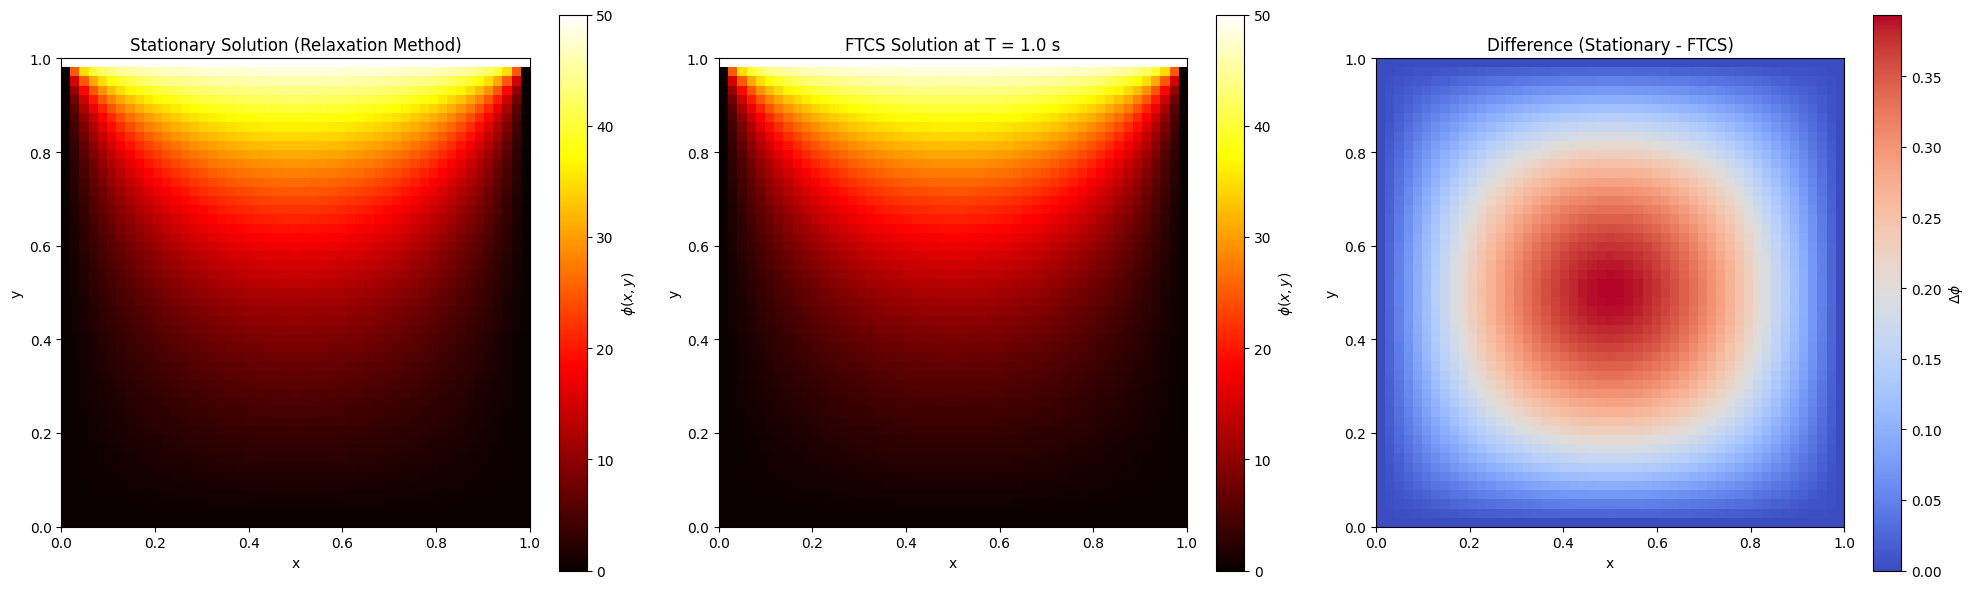


Maximum absolute difference between solutions: 0.3937


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters from previous cells ---
Lx, Ly = 1.0, 1.0
Nx, Ny = 51, 51
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)
dx2, dy2 = dx**2, dy**2

# --- Relaxation Method for Stationary Solution (Laplace Equation) ---
# Initial guess for phi_stationary (can be zeros)
phi_stationary = np.zeros((Nx, Ny))

# Set boundary conditions
phi_stationary[:, Ny-1] = 50.0

# Iteration parameters
tolerance = 1e-17 # For 16 digits of accuracy
max_iterations = 20000
iteration = 0
max_change = tolerance + 1.0

# Normalization factor for the update rule
norm = 0.5 / (1/dx2 + 1/dy2)

print("Starting relaxation method...")
while max_change > tolerance and iteration < max_iterations:
    phi_old = phi_stationary.copy()
    max_change = 0.0
    
    # Update interior points using Gauss-Seidel method
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            term_x = (phi_stationary[i+1, j] + phi_stationary[i-1, j]) / dx2
            term_y = (phi_stationary[i, j+1] + phi_stationary[i, j-1]) / dy2
            new_val = norm * (term_x + term_y)
            
            # Track the maximum change in this iteration
            change = abs(new_val - phi_stationary[i, j])
            if change > max_change:
                max_change = change
            
            phi_stationary[i, j] = new_val
    
    iteration += 1
    if iteration % 1000 == 0:
        print(f"Iteration {iteration}, Max Change: {max_change:.2e}")

print(f"Relaxation method converged after {iteration} iterations.")
print(f"Final max change: {max_change:.2e}")

# --- Comparison ---
# Get the final state from the stable FTCS simulation (from part b)
phi_final_ftcs = phi_history[-1]

# Calculate the difference
difference = phi_stationary - phi_final_ftcs

# --- Plotting ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Stationary Solution (Relaxation)
im1 = axes[0].imshow(phi_stationary.T, cmap='hot', origin='lower', extent=[0, Lx, 0, Ly], vmin=0, vmax=50)
axes[0].set_title('Stationary Solution (Relaxation Method)')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
fig.colorbar(im1, ax=axes[0], label='$\phi(x,y)$')

# 2. Final FTCS Solution
im2 = axes[1].imshow(phi_final_ftcs.T, cmap='hot', origin='lower', extent=[0, Lx, 0, Ly], vmin=0, vmax=50)
axes[1].set_title(f'FTCS Solution at T = {T_max:.1f} s')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
fig.colorbar(im2, ax=axes[1], label='$\phi(x,y)$')

# 3. Difference
im3 = axes[2].imshow(difference.T, cmap='coolwarm', origin='lower', extent=[0, Lx, 0, Ly])
axes[2].set_title('Difference (Stationary - FTCS)')
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
fig.colorbar(im3, ax=axes[2], label='$\Delta\phi$')

plt.tight_layout()
plt.show()

# Conclusion
max_diff = np.max(np.abs(difference))
print(f"\nMaximum absolute difference between solutions: {max_diff:.4f}")

# 몇번 이터레이션이 넘어갔을 때, 수렴했다는 그게 나와야되고 그게 아니면 몇번 반복했더니 이 값이 나왔다 뭐 이게 되야한다고함 

---
# Problem 2

Now we are going to solve another problem, namely the wave equation given by
\begin{align*}
  \frac{\partial^2 \phi}{\partial t^2} = v^2\nabla^2\phi
\end{align*}
in two dimensions.

We will first attempt to use the FTCS method. Defining $\psi=\partial\phi/\partial t$ and applying the FTCS method in 1D gives
\begin{align*}
  \phi(x,t+\Delta t) &= \phi(x,t) + \Delta t \psi(x,t),\\
  \psi(x,t+\Delta t) &= \psi(x,t) + \Delta t \frac{v^2}{\Delta x^2}\left[\phi(x+\Delta x,t)+\phi(x-\Delta x,t) -2 \phi(x,t)\right].
\end{align*}

(a) Numerically solve the 2D wave equation using the FTCS method for the domain $(L_x,L_y)=(1,1)$ with $v=0.1$ for $T_{max}=20$. Discretize the grid into $(N_x,N_y)=(256,256)$ points. Choose $\Delta t=0.005$. Choose the initial condition $\phi=0$ and
\begin{align*}
  \psi(t=0) = \exp\left(-\frac{(x-L_x/2)^2+(y-L_y/2)^2}{\sigma^2}\right)
\end{align*}
with $\sigma=0.1$. Let $\phi=\psi=0$ at all boundaries.

Plot $\phi$ and save the animation file as 'Wave_equation_FTCS.mp4'. Set colorbar limits to (-0.5,0.5) by setting the vmin, vmax options in imshow. What happens eventually? (20 pts)

(b) It is clear that we need to conduct a stability analysis. Discretizing the variable in space and time means that, in Fourier space, we are assuming solutions of the form
\begin{align*}
  \phi(n,m) &= \phi_0 \exp(ink\Delta x-im\omega\Delta t),\\
  \psi(n,m) &= \psi_0 \exp(ink\Delta x-im\omega\Delta t),
\end{align*}
where $m$ and $n$ are integers.

Insert these ansatz to the FTCS method and show that it yields the following linear equation
\begin{align*}
\left(\begin{array}{cc}
1-e^{-i\omega\Delta t} & \Delta t\\
-4\Delta t\frac{v^{2}}{\Delta x^{2}}\sin^{2}\left(\frac{k\Delta x}{2}\right) & 1-e^{-i\omega\Delta t}
\end{array}\right)\left(\begin{array}{c}
\phi_{0}\\
\psi_{0}
\end{array}\right)=0.
\end{align*}
(10 pts)


(c) Show that a non-trivial solution exists only if
\begin{align*}
  (1-e^{-i\omega\Delta t})^2 + 4\Delta t^2 \frac{v^2}{\Delta x^2}\sin^2\left(\frac{k\Delta x}{2}\right)=0,
\end{align*}
which is the "numerical dispersion relation." For a given $k$, the solution for $\omega$ is in general complex. This means that there will be solutions that exponentially grow in time, i.e., that are numerically unstable. Thus, unfortunately, FTCS is ALWAYS unstable for the wave equation.
(5 pts)

(d) Instead, let us use the leapfrog method defined by
\begin{align*}
  \phi(x,t+\Delta t) &= \phi(x,t) + \Delta t \psi(x,t+\frac{1}{2}\Delta t),\\
  \psi(x,t+\frac{3}{2}\Delta t) &= \psi(x,t+\frac{1}{2}\Delta t) + \Delta t \frac{v^2}{\Delta x^2}\left[\phi(x+\Delta x,t+\Delta t)+\phi(x-\Delta x,t+\Delta t) -2 \phi(x,t+\Delta t)\right].
\end{align*}
By performing a similar stability analysis, show that the numerical dispersion relation is
\begin{align*}
  \sin^2\left(\frac{\omega\Delta t}{2}\right) = \Delta t^2 \frac{v^2}{\Delta x^2}\sin^2\left(\frac{k\Delta x}{2}\right).
\end{align*}
Explain why for the algorithm to be numerically stable, the condition
\begin{align*}
  \Delta t < \frac{\Delta x}{v}
\end{align*}
needs to be satisfied.

For two dimensions, it is trivial to show that the condition is $\Delta t < \Delta r/ v$ where $\Delta r$ is defined in Problem 1. (10 pts)


(e) Numerically solve the same wave equation system using the leapfrog method by choosing a timestep that satisfies the stability condition, e.g., $\Delta t = 0.95 \Delta r /v$. (20pts)

(f) Set $\Delta t=1.01\Delta r /v$ and rerun the simulation, and save the file as 'Wave_equation_Leapfrog_unstable.mp4'. What do you expect and what happens? (10pts)

(g) Let us now try changing the boundary conditions. A common boundary condition is what is called a "periodic boundary condition," which means the value at the left boundary is equal to the rightmost value, etc, so that the domain repeats itself in all directions. In other words,
\begin{align*}
  \phi(0,y) &= \phi(L-\Delta x,y),\\
  \phi(L,y) &= \phi(\Delta x,y),\\
  \phi(x,0) &= \phi(x,L-\Delta y),\\
  \phi(x,L) &= \phi(x,\Delta y).
\end{align*}
Implement the periodic boundary condition for the wave equation using the leapfrog method, and this time plot the result in 3D using the plt.plot_surface function and save the result as 'Wave_equation_Leapfrog_periodic_3D.mp4'. Briefly describe in words what is happening and the difference from the previous boundary case. (25 pts)